Letter 和 area 的网络架构差不多一样，但是province的模型就要复杂一点，因为文字可能更加难以识别相对于字幕和数字来说

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers
import pandas as pd
from keras.utils.np_utils import to_categorical
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_train_set_letter=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data_letter.csv').values
x_letter_train=np.reshape(data_train_set_letter[:,0:-1]/255,(-1,20,20,1))
y_letter_train=to_categorical(data_train_set_letter[:,-1].astype("int64"),34)




In [ ]:
x_letter_train.shape

(10540, 20, 20, 1)

In [ ]:
def model_letter2():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(34))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [ ]:
model_letter =model_letter2()
model_letter.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history_letter=model_letter.fit(
  x_letter_train,y_letter_train,
  batch_size=128,
  epochs=50,
  validation_split=0.2,
  validation_freq=1,
  
)

Epoch 1/50
66/66 [==============================] - 0s 6ms/step - loss: 2.4889 - accuracy: 0.4522 - val_loss: 0.9633 - val_accuracy: 0.7837
Epoch 2/50
66/66 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.9134 - val_loss: 0.1771 - val_accuracy: 0.9668
Epoch 3/50
66/66 [==============================] - 0s 3ms/step - loss: 0.1148 - accuracy: 0.9717 - val_loss: 0.1121 - val_accuracy: 0.9744
Epoch 4/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0735 - accuracy: 0.9827 - val_loss: 0.0862 - val_accuracy: 0.9787
Epoch 5/50
66/66 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9885 - val_loss: 0.0815 - val_accuracy: 0.9843
Epoch 6/50
66/66 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9902 - val_loss: 0.0702 - val_accuracy: 0.9843
Epoch 7/50
66/66 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9936 - val_loss: 0.0751 - val_accuracy: 0.9848
Epoch 8/50
66/66 [==

In [ ]:
data_test_set_letter=pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_data_letter.csv').values
x_letter_test=np.reshape(data_test_set_letter[:,0:-1]/255,(-1,20,20,1))
y_letter_test=to_categorical(data_test_set_letter[:,-1].astype("int64"))

In [ ]:
model_letter.evaluate(x_letter_test,y_letter_test)

83/83 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9909


[0.06221923232078552, 0.9908918142318726]

In [ ]:
model_letter.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 20, 20, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 34)                13634     
_________________________________________________________________
activation_16 (Activation)   (None, 34)              

Text(0.5, 1.0, 'CNN modle of Letter')

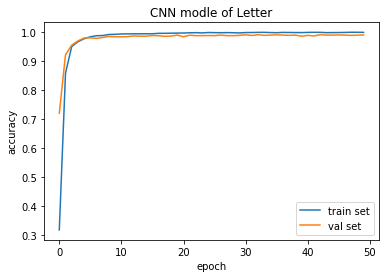

In [ ]:
plt.plot(history_letter.history['accuracy'],label="train set")
plt.plot(history_letter.history['val_accuracy'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN model of Letter")

Text(0.5, 1.0, 'CNN modle of Letter')

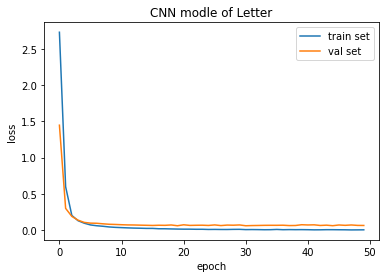

In [ ]:
plt.plot(history_letter.history['loss'],label="train set")
plt.plot(history_letter.history['val_loss'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN model of Letter")

Area


In [ ]:
data_train_set_area=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data_area.csv').values
x_area_train=np.reshape(data_train_set_area[:,0:-1]/255,(-1,20,20,1))
y_area_train=to_categorical(data_train_set_area[:,-1])

In [ ]:
def model_area_model():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  # model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dense(512))
  # model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(26))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [ ]:
model_area =model_area_model()
model_area.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history_area=model_area.fit(
  x_area_train,y_area_train,
  batch_size=32,
  epochs=50,
  validation_split=0.2,
  validation_freq=1,
  
)

Epoch 1/50
135/135 [==============================] - 1s 4ms/step - loss: 1.5807 - accuracy: 0.5705 - val_loss: 0.2848 - val_accuracy: 0.9143
Epoch 2/50
135/135 [==============================] - 0s 3ms/step - loss: 0.1411 - accuracy: 0.9655 - val_loss: 0.0949 - val_accuracy: 0.9832
Epoch 3/50
135/135 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9809 - val_loss: 0.0657 - val_accuracy: 0.9804
Epoch 4/50
135/135 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9853 - val_loss: 0.0705 - val_accuracy: 0.9804
Epoch 5/50
135/135 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9900 - val_loss: 0.0442 - val_accuracy: 0.9907
Epoch 6/50
135/135 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9944 - val_loss: 0.0552 - val_accuracy: 0.9842
Epoch 7/50
135/135 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0709 - val_accuracy: 0.9860
Epoch 

In [ ]:
data_test_set_area=pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_data_area.csv').values
x_area_test=np.reshape(data_test_set_area[:,0:-1]/255,(-1,20,20,1))
y_area_test=to_categorical(data_test_set_area[:,-1].astype("int64"))

In [ ]:
model_area.evaluate(x_area_test,y_area_test)

42/42 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9940


[0.038372702896595, 0.9940431714057922]

In [ ]:
model_area.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 20, 20, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 26)                10426     
_________________________________________________________________
activation_14 (Activation)   (None, 26)              

Text(0.5, 1.0, 'CNN modle of Area')

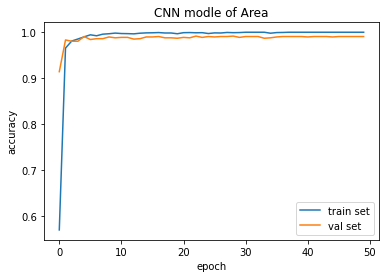

In [ ]:
plt.plot(history_area.history['accuracy'],label="train set")
plt.plot(history_area.history['val_accuracy'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN model of Area")

Text(0.5, 1.0, 'CNN modle of Area')

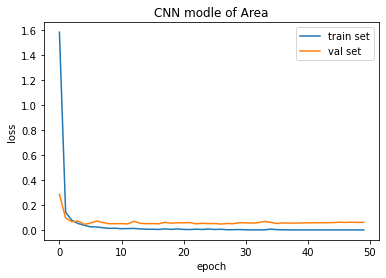

In [ ]:
plt.plot(history_area.history['loss'],label="train set")
plt.plot(history_area.history['val_loss'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN model of Area")

Province

In [ ]:
data_train_set_province=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data_province.csv').values
x_province_train=np.reshape(data_train_set_province[:,0:-1]/255,(-1,20,20,1))
y_province_train=to_categorical(data_train_set_province[:,-1])

In [ ]:
y_province_train.shape

(2223, 31)

In [ ]:
def model_province_model():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(31))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [ ]:
model_province =model_province_model()
model_province.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history_province=model_province.fit(
  x_province_train,y_province_train,
  batch_size=128,
  epochs=200,
  validation_split=0.2,
  validation_freq=1,
  
)

Epoch 1/200
14/14 [==============================] - 0s 25ms/step - loss: 3.5272 - accuracy: 0.0692 - val_loss: 3.4050 - val_accuracy: 0.0876
Epoch 2/200
14/14 [==============================] - 0s 12ms/step - loss: 3.3729 - accuracy: 0.0782 - val_loss: 3.2818 - val_accuracy: 0.0876
Epoch 3/200
14/14 [==============================] - 0s 12ms/step - loss: 3.2267 - accuracy: 0.0883 - val_loss: 3.1616 - val_accuracy: 0.1034
Epoch 4/200
14/14 [==============================] - 0s 11ms/step - loss: 3.1812 - accuracy: 0.0962 - val_loss: 3.1487 - val_accuracy: 0.1034
Epoch 5/200
14/14 [==============================] - 0s 11ms/step - loss: 3.1737 - accuracy: 0.1007 - val_loss: 3.1517 - val_accuracy: 0.1034
Epoch 6/200
14/14 [==============================] - 0s 11ms/step - loss: 3.1762 - accuracy: 0.0962 - val_loss: 3.1518 - val_accuracy: 0.1034
Epoch 7/200
14/14 [==============================] - 0s 11ms/step - loss: 3.1738 - accuracy: 0.0956 - val_loss: 3.1491 - val_accuracy: 0.1034
Epoch 

In [ ]:
data_test_set_province=pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_data_province.csv').values
x_province_test=np.reshape(data_test_set_province[:,0:-1]/255,(-1,20,20,1))
y_province_test=to_categorical(data_test_set_province[:,-1].astype("int64"))

In [ ]:
model_province.evaluate(x_province_test,y_province_test)

18/18 [==============================] - 0s 4ms/step - loss: 0.1887 - accuracy: 0.9676


[0.18874643743038177, 0.9676259160041809]

In [ ]:
model_province.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 20, 20, 32)        320       
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 5, 5, 64)        

Text(0.5, 1.0, 'CNN modle of Area')

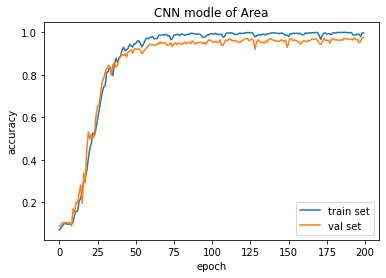

In [ ]:
plt.plot(history_province.history['accuracy'],label="train set")
plt.plot(history_province.history['val_accuracy'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN model of Province")

Text(0.5, 1.0, 'CNN modle of Area')

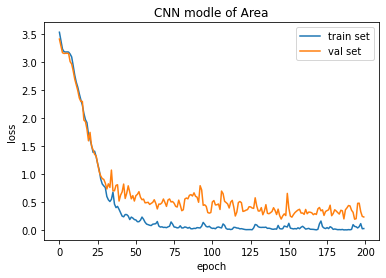

In [ ]:
plt.plot(history_province.history['loss'],label="train set")
plt.plot(history_province.history['val_loss'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN model of Province")